In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Misc libraries
import warnings
warnings.filterwarnings("ignore")


/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [119]:
# read the data
df = pd.read_csv("/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv")

In [120]:
#ML libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#Misc libraries
import warnings
warnings.filterwarnings("ignore")

In [121]:
# read the data
df = pd.read_csv("/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv")

In [122]:
# checking the first 5 rows of the data
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [123]:
# checking the shape of the data
df.shape

(6362620, 11)

In [124]:
# checking the overall info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [125]:
# checking for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [126]:
# descriptive statistics of the data
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


In [127]:
# checking type column categories
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [128]:
# storing the column ech categorie count 
type = df["type"].value_counts()

In [129]:
# getting the categories in type column
transaction = type.index

In [130]:
quantity = type.values
quantity

array([2237500, 2151495, 1399284,  532909,   41432])

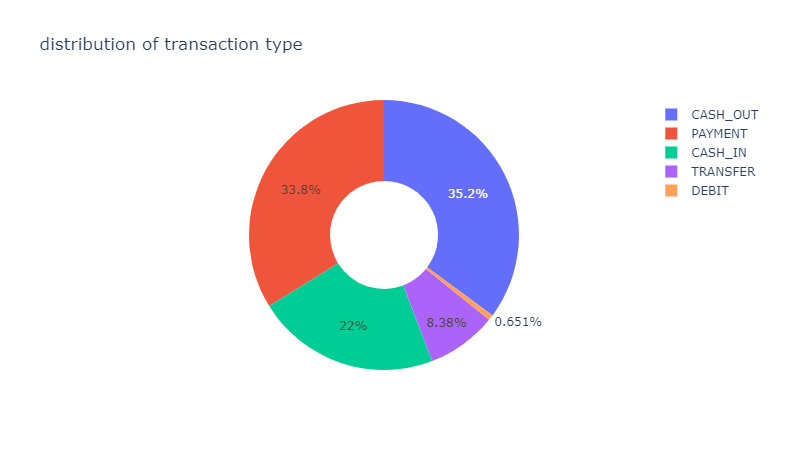

In [131]:
# visualizing the type column categories
px.pie(df, values = quantity, names = transaction,hole = 0.4,title = "distribution of transaction type")

In [132]:
# Count the number of occurrences of each value in the 'isFraud' column
fraud_counts = df['isFraud'].value_counts()

# Calculate the percentage of fraud and non-fraud cases
fraud_percentage = (fraud_counts[1] / len(df)) * 100
non_fraud_percentage = (fraud_counts[0] / len(df)) * 100

# Print the fraud and non-fraud percentages
print("Fraud percentage:", fraud_percentage)
print("Non-fraud percentage:", non_fraud_percentage)

Fraud percentage: 0.12908204481801522
Non-fraud percentage: 99.87091795518198


In [133]:
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('\n The number of fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout)))



 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFERs = 4097

 The number of fraudulent CASH_OUTs = 4116


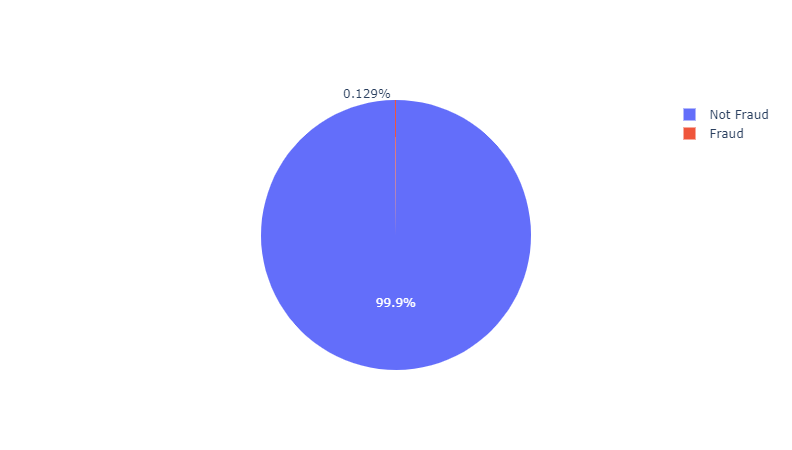

In [134]:
#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=df['isFraud'].value_counts())])
fig.show()

In [135]:
# replacing string to integer values bassed the max occurance in the data
df.replace(to_replace = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], value = [2,4,1,5,3],inplace = True)

In [136]:
# taking the required columns for further analysis
x = df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y = df[['isFraud']]

In [137]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling:
undersampler = RandomUnderSampler(random_state=42)
X_res, y_res = undersampler.fit_resample(x, y)

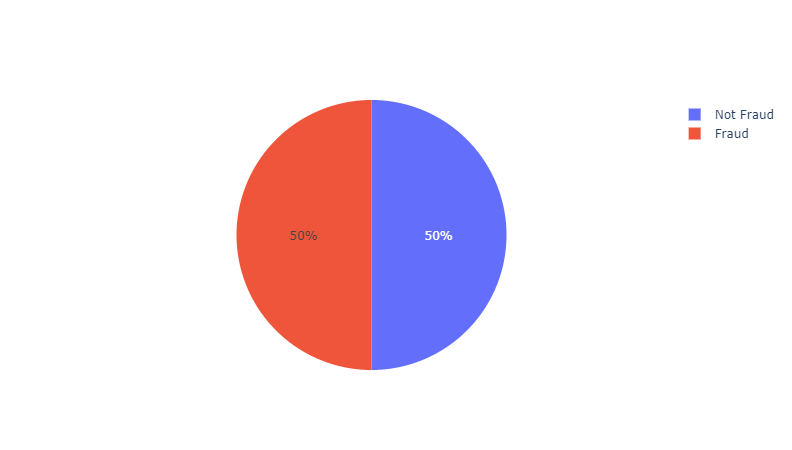

In [138]:
#Checking for balance in target
fig = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=y_res['isFraud'].value_counts())])
fig.show()

In [139]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, random_state=111)

In [140]:
#Standardizing the numerical columns
col_names=['amount','oldbalanceOrg','newbalanceOrig']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [141]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear',random_state=123)
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv,rf_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8843279978809552
Decision Tree Test Accuracy: 0.9920858969992811
KNN Test Accuracy: 0.9906939115298747
SVC Test Accuracy: 0.8763267869981458
Naive Bayes Test Accuracy: 0.670637378438718
Random Forest Test Accuracy: 0.992781397812843


In [142]:
# hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5, 10],
}
# Create the Random Forest classifier
rfc = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Evaluate the best model on the test data
y_pred = best_estimator.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", test_accuracy)

Best parameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}
Test accuracy: 0.9902597402597403


In [143]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99      2432
       Fraud       0.98      1.00      0.99      2496

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [146]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined

# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))


              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99      2432
       Fraud       0.98      1.00      0.99      2496

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928

